# Airline Data Exploration

## Table of Contents
<ul>
<li><a href="#Preliminary Wrangling">Preliminary Wrangling</a></li>
<li><a href="#Column Defination">Column Defination</a></li>
<li><a href="#Univariate Exploration">Univariate Exploration</a></li>
<li><a href="#Bivarite Exploration">Bivarite Exploration</a></li>
<li><a href="#Preliminary Wrangling">Preliminary Wrangling</a></li>
<li><a href="#Multivariate Exploration">Multivariate Exploration</a></li>
<li><a href="#Oberservation">Oberservation</a></li>
</ul>

<a id='Preliminary Wrangling'></a>
# Preliminary Wrangling

This document explores a dataset containing approximately 925,000 US domestic flights in 2019.04 and 2020.04.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
airline2020 = pd.read_csv('202004.csv')
airline2019 = pd.read_csv('201904.csv')

In [3]:
# merge two year into one dataframe
airline = pd.concat([airline2020,airline2019])

In [4]:
# high-level overview of data shape and composition
print(airline.shape)
print(airline.dtypes)

(925405, 27)
YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
OP_CARRIER              object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEP_DELAY              float64
DEP_TIME_BLK            object
ARR_DELAY              float64
ARR_DEL15              float64
ARR_TIME_BLK            object
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE_GROUP           int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object


In [5]:
# convert object into category datatype
airline['OP_CARRIER'] = airline['OP_CARRIER'].astype('category')
airline['ORIGIN'] = airline['ORIGIN'].astype('category')
airline['ORIGIN_CITY_NAME'] = airline['ORIGIN_CITY_NAME'].astype('category')
airline['ORIGIN_STATE_ABR'] = airline['ORIGIN_STATE_ABR'].astype('category')
airline['DEST'] = airline['DEST'].astype('category')
airline['DEST_CITY_NAME'] = airline['DEST_CITY_NAME'].astype('category')
airline['DEST_STATE_ABR'] = airline['DEST_STATE_ABR'].astype('category')


In [6]:
# list departure time block to work on
airline['DEP_TIME_BLK']

0         0900-0959
1         0900-0959
2         1800-1859
3         1800-1859
4         1800-1859
            ...    
612018    2200-2259
612019    2200-2259
612020    2200-2259
612021    2200-2259
612022    2200-2259
Name: DEP_TIME_BLK, Length: 925405, dtype: object

In [7]:
# replace departature time block with hour format
DEP = airline['DEP_TIME_BLK'].str.extract("([0-9][0-9])")
DEP = DEP.replace("00","24")
airline['DEP_TIME_BLK'] = DEP

# convert type to int64
airline['DEP_TIME_BLK'] = airline['DEP_TIME_BLK'].astype('int64')


In [8]:
# pull out all delayed flights and store as dataframe
delay = airline[airline['ARR_DEL15'] == 1]
delay.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
18,2020,4,20,1,OH,DAY,"Dayton, OH",OH,PHL,"Philadelphia, PA",...,NaN,0,94.0,83.0,2,104.0,0.0,0.0,0.0,0.0
29,2020,4,2,4,OH,SAV,"Savannah, GA",GA,DFW,"Dallas/Fort Worth, TX",...,NaN,0,172.0,192.0,4,0.0,0.0,15.0,0.0,0.0
31,2020,4,4,6,OH,SAV,"Savannah, GA",GA,DFW,"Dallas/Fort Worth, TX",...,NaN,0,172.0,188.0,4,7.0,0.0,16.0,0.0,0.0
33,2020,4,6,1,OH,SAV,"Savannah, GA",GA,DFW,"Dallas/Fort Worth, TX",...,NaN,0,172.0,180.0,4,132.0,0.0,8.0,0.0,0.0
35,2020,4,8,3,OH,SAV,"Savannah, GA",GA,DFW,"Dallas/Fort Worth, TX",...,NaN,0,172.0,173.0,4,23.0,0.0,1.0,0.0,0.0


In [9]:
# create a dataframe for delay reasons, containing five major reasons
reasons = delay.filter(['YEAR','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
reasons

,YEAR,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
18,2020,104.0,0.0,0.0,0.0,0.0
29,2020,0.0,0.0,15.0,0.0,0.0
31,2020,7.0,0.0,16.0,0.0,0.0
33,2020,132.0,0.0,8.0,0.0,0.0
35,2020,23.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
612000,2019,0.0,0.0,9.0,0.0,7.0
612003,2019,2.0,0.0,21.0,0.0,0.0
612007,2019,4.0,0.0,4.0,0.0,11.0
612016,2019,0.0,0.0,0.0,0.0,38.0


In [10]:
# create a temperory dataframe for carrier delay
carrier_delay = delay.filter(['CARRIER_DELAY','YEAR'], axis=1)

# add a reason column, filing with carrier delay
carrier_delay.loc[(carrier_delay['CARRIER_DELAY'] != 0), 'Reason'] = 'Carrier Delay'

# clean the dataframe
carrier_delay.rename(columns={"CARRIER_DELAY": "Time"},inplace=True)
carrier_delay['Reason'].replace('', np.nan, inplace=True)
carrier_delay.dropna(subset=['Reason'], inplace=True)
carrier_delay

,Time,YEAR,Reason
18,104.0,2020,Carrier Delay
31,7.0,2020,Carrier Delay
33,132.0,2020,Carrier Delay
35,23.0,2020,Carrier Delay
83,33.0,2020,Carrier Delay
...,...,...,...
611989,2.0,2019,Carrier Delay
611997,14.0,2019,Carrier Delay
612003,2.0,2019,Carrier Delay
612007,4.0,2019,Carrier Delay


In [11]:
# create a temperory dataframe for weather delay
weather_delay = delay.filter(['WEATHER_DELAY','YEAR'], axis=1)
weather_delay.loc[(weather_delay['WEATHER_DELAY'] != 0), 'Reason'] = 'Weather Delay'
weather_delay.rename(columns={"WEATHER_DELAY": "Time"},inplace=True)
weather_delay['Reason'].replace('', np.nan, inplace=True)
weather_delay.dropna(subset=['Reason'], inplace=True)
weather_delay

,Time,YEAR,Reason
40,130.0,2020,Weather Delay
982,75.0,2020,Weather Delay
1137,28.0,2020,Weather Delay
1379,123.0,2020,Weather Delay
2183,28.0,2020,Weather Delay
...,...,...,...
611492,4.0,2019,Weather Delay
611626,74.0,2019,Weather Delay
611716,53.0,2019,Weather Delay
611735,5.0,2019,Weather Delay


In [12]:
# create a temperory dataframe for nas delay
nas_delay = delay.filter(['NAS_DELAY','YEAR'], axis=1)
nas_delay.loc[(nas_delay['NAS_DELAY'] != 0), 'Reason'] = 'Nas Delay'
nas_delay.rename(columns={"NAS_DELAY": "Time"},inplace=True)
nas_delay['Reason'].replace('', np.nan, inplace=True)
nas_delay.dropna(subset=['Reason'], inplace=True)
nas_delay

,Time,YEAR,Reason
29,15.0,2020,Nas Delay
31,16.0,2020,Nas Delay
33,8.0,2020,Nas Delay
35,1.0,2020,Nas Delay
39,18.0,2020,Nas Delay
...,...,...,...
611997,7.0,2019,Nas Delay
612000,9.0,2019,Nas Delay
612003,21.0,2019,Nas Delay
612007,4.0,2019,Nas Delay


In [13]:
# create a temperory dataframe for security delay
security_delay = delay.filter(['SECURITY_DELAY','YEAR'], axis=1)
security_delay.loc[(security_delay['SECURITY_DELAY'] != 0), 'Reason'] = 'Security Delay'
security_delay.rename(columns={"SECURITY_DELAY": "Time"},inplace=True)
security_delay['Reason'].replace('', np.nan, inplace=True)
security_delay.dropna(subset=['Reason'], inplace=True)
security_delay

,Time,YEAR,Reason
2650,24.0,2020,Security Delay
3427,33.0,2020,Security Delay
9753,61.0,2020,Security Delay
11963,77.0,2020,Security Delay
30046,64.0,2020,Security Delay
...,...,...,...
609613,28.0,2019,Security Delay
609623,26.0,2019,Security Delay
609626,141.0,2019,Security Delay
609627,31.0,2019,Security Delay


In [14]:
# create a temperory dataframe for late aircraft delay
late_aircraft_delay = delay.filter(['LATE_AIRCRAFT_DELAY','YEAR'], axis=1)
late_aircraft_delay.loc[(late_aircraft_delay['LATE_AIRCRAFT_DELAY'] != 0), 'Reason'] = 'Late Aircraft Delay'
late_aircraft_delay.rename(columns={"LATE_AIRCRAFT_DELAY": "Time"},inplace=True)
late_aircraft_delay['Reason'].replace('', np.nan, inplace=True)
late_aircraft_delay.dropna(subset=['Reason'], inplace=True)
late_aircraft_delay

,Time,YEAR,Reason
187,3.0,2020,Late Aircraft Delay
188,79.0,2020,Late Aircraft Delay
304,78.0,2020,Late Aircraft Delay
346,60.0,2020,Late Aircraft Delay
368,51.0,2020,Late Aircraft Delay
...,...,...,...
611991,166.0,2019,Late Aircraft Delay
611997,6.0,2019,Late Aircraft Delay
612000,7.0,2019,Late Aircraft Delay
612007,11.0,2019,Late Aircraft Delay


In [15]:
# append five temperory dataframes into one delay reason dataframe
delay_reason = carrier_delay.append([weather_delay,nas_delay,security_delay,late_aircraft_delay])
delay_reason.head()

,Time,YEAR,Reason
18,104.0,2020,Carrier Delay
31,7.0,2020,Carrier Delay
33,132.0,2020,Carrier Delay
35,23.0,2020,Carrier Delay
83,33.0,2020,Carrier Delay


In [16]:
# pull out all diverted flights and store as dataframe
diverted = airline[airline['DIVERTED'] == 1]
diverted.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
234,2020,4,13,1,OH,CAE,"Columbia, SC",SC,DCA,"Washington, DC",...,NaN,1,84.0,NaN,2,NaN,NaN,NaN,NaN,NaN
314,2020,4,30,4,OH,PHL,"Philadelphia, PA",PA,ORF,"Norfolk, VA",...,NaN,1,68.0,NaN,1,NaN,NaN,NaN,NaN,NaN
317,2020,4,12,7,OH,CLT,"Charlotte, NC",NC,GSP,"Greer, SC",...,NaN,1,53.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1093,2020,4,25,6,OH,SAV,"Savannah, GA",GA,CLT,"Charlotte, NC",...,NaN,1,80.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1716,2020,4,24,5,OH,DAB,"Daytona Beach, FL",FL,CLT,"Charlotte, NC",...,NaN,1,94.0,NaN,2,NaN,NaN,NaN,NaN,NaN


In [17]:
# pull out all cancelled flights and store as dataframe
cancelled = airline[airline['CANCELLED'] == 1]
cancelled.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,4,18,6,OH,CLT,"Charlotte, NC",NC,BWI,"Baltimore, MD",...,D,0,96.0,NaN,2,NaN,NaN,NaN,NaN,NaN
1,2020,4,25,6,OH,CLT,"Charlotte, NC",NC,BWI,"Baltimore, MD",...,D,0,96.0,NaN,2,NaN,NaN,NaN,NaN,NaN
2,2020,4,1,3,OH,DAY,"Dayton, OH",OH,PHL,"Philadelphia, PA",...,D,0,92.0,NaN,2,NaN,NaN,NaN,NaN,NaN
5,2020,4,5,7,OH,DAY,"Dayton, OH",OH,PHL,"Philadelphia, PA",...,D,0,92.0,NaN,2,NaN,NaN,NaN,NaN,NaN
11,2020,4,12,7,OH,DAY,"Dayton, OH",OH,PHL,"Philadelphia, PA",...,D,0,94.0,NaN,2,NaN,NaN,NaN,NaN,NaN


## What is the structure of this dataset?

There were 925,407 flights during the month of 2019.4 and 2020.4. This consisted of 612,023 flights in 2019.04 and 313,382 flights in 2020,04. The featured of this dataset are the time, destination, carrier, delay and cancellation information.

<a id='Column Defination'></a>
## Column Defination
**YEAR**<br>2019 and 2020<br>
**MONTH**<br> April<br>
**DAY_OF_MONTH**<br> 1-30 day of April<br>
**DAY_OF_WEEK**<br>Monday to Sunday<br>
**OP_CARRIER**<br> Code assigned by IATA and commonly used to identify a carrier<br>
**ORIGIN**<br> Departaure Airport Code<br>
**ORIGIN_CITY_NAME**<br> Departure City<br>
**ORIGIN_STATE_ABR**<br> Departure State<br>

**DEST**<br> Arrival Airport Code<br>
**DEST_CITY_NAME**<br> Arrival City<br>
**DEST_STATE_ABR**<br> Arrival State<br>
**DEP_DELAY**<br> Difference in minutes between scheduled and actual departure time<br>
**DEP_TIME_BLK**<br> Departure Time by hour<br>
**ARR_DELAY**<br> Difference in minutes between scheduled and actual arrival time<br>
**ARR_TIME_BLK**<br> Arrival Time by hour<br>
**ARR_DEL15**<br> Arrival Delay Indicator, 15 Minutes or More (1=Yes)<br>
**CANCELLED**<br> Cancelled Flight Indicator (1=Yes)<br>
**CANCELLATION_CODE**<br> Specifies The Reason For Cancellation<br>
**DIVERTED**<br> Diverted Flight Indicator (1=Yes)<br>

**CARRIER_DELAY**<br> Carrier Delay, in Minutes	<br>
**WEATHER_DELAY**<br> Weather Delay, in Minutes<br>
**NAS_DELAY**<br> National Air System Delay, in Minutes<br>
**SECURITY_DELAY**<br> Security Delay, in Minutes<br>
**LATE_AIRCRAFT_DELAY**<br> Late Aircraft Delay, in Minutes	<br>

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

_I expect the flights in 2020.4 were less likely to be delayed, more but likely to be cancelled comparing to 2019.4 due to travel restriction. I expect the cause of delay would be quite different._

<a id='Univariate Exploration'></a>
# Univariate Exploration

### Total Flights(normal, delayed, diverted, cancelled), 2019 VS 2020

**Comment:** Here we can see a dramatic decline in year 2020 from 2019 in total flight numbers, about 50% of flights. When we subtract the cancelled flights, the active 2020 flights only accounts approximately **25% of the previous year**. When comparing diverted and delayed flights, with 2020 to 2019, the number **declines in perportion**.

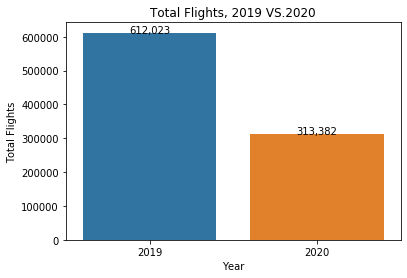

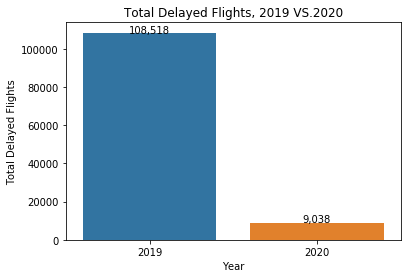

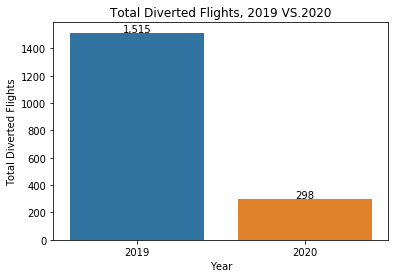

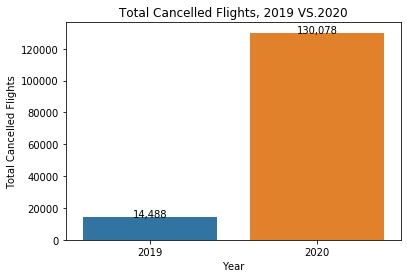

In [18]:
# plot a comparison of total flights of two month
ax = sb.countplot(data = airline, x = 'YEAR')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:,}'.format(height),
            ha="center") 
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.title('Total Flights, 2019 VS.2020')
plt.show()

# plot a comparison of delayed flights of two month
ax = sb.countplot(data = delay, x = 'YEAR')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:,}'.format(height),
            ha="center") 
plt.xlabel('Year')
plt.ylabel('Total Delayed Flights')
plt.title('Total Delayed Flights, 2019 VS.2020')
plt.show()

# plot a comparison of divertd flights of two month
ax = sb.countplot(data = diverted, x = 'YEAR')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:,}'.format(height),
            ha="center") 
plt.xlabel('Year')
plt.ylabel('Total Diverted Flights')
plt.title('Total Diverted Flights, 2019 VS.2020')
plt.show()

# plot a comparison of cancelled flights of two month
ax = sb.countplot(data = cancelled, x = 'YEAR')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:,}'.format(height),
            ha="center") 
plt.xlabel('Year')
plt.ylabel('Total Cancelled Flights')
plt.title('Total Cancelled Flights, 2019 VS.2020')
plt.show()

### Flight Number by Departature State Analysis

**Comment**: The travel restriction in 2020 resulted in declined flight numbers in all 50 US states. **New York and surrounding Northeastern states**(NJ- New Jersey, MA- Massachusetts) had the most visible downsizing among the top departature states, as well as **overseas state and territories**(HI-Hawaii and PR-Puerto Rico).

Text(0.5, 1, 'Total Flights by Departature, 2019 VS.2020, Last 25')

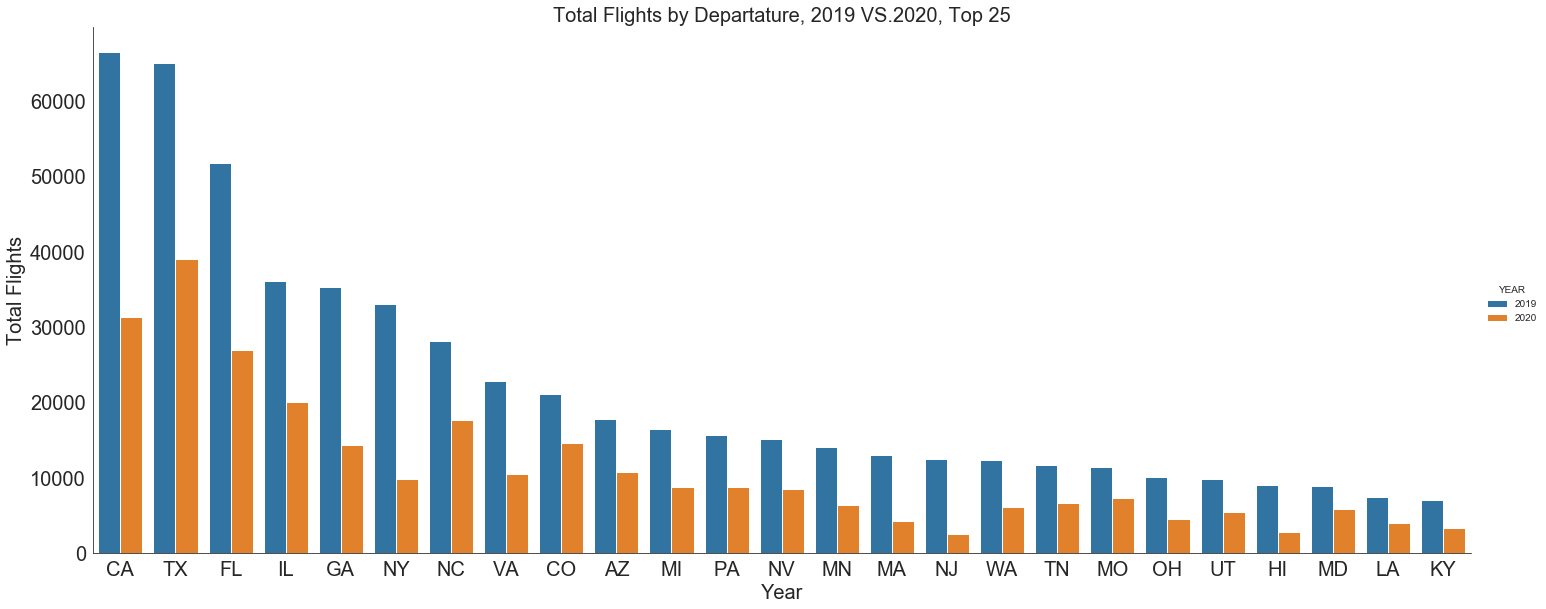

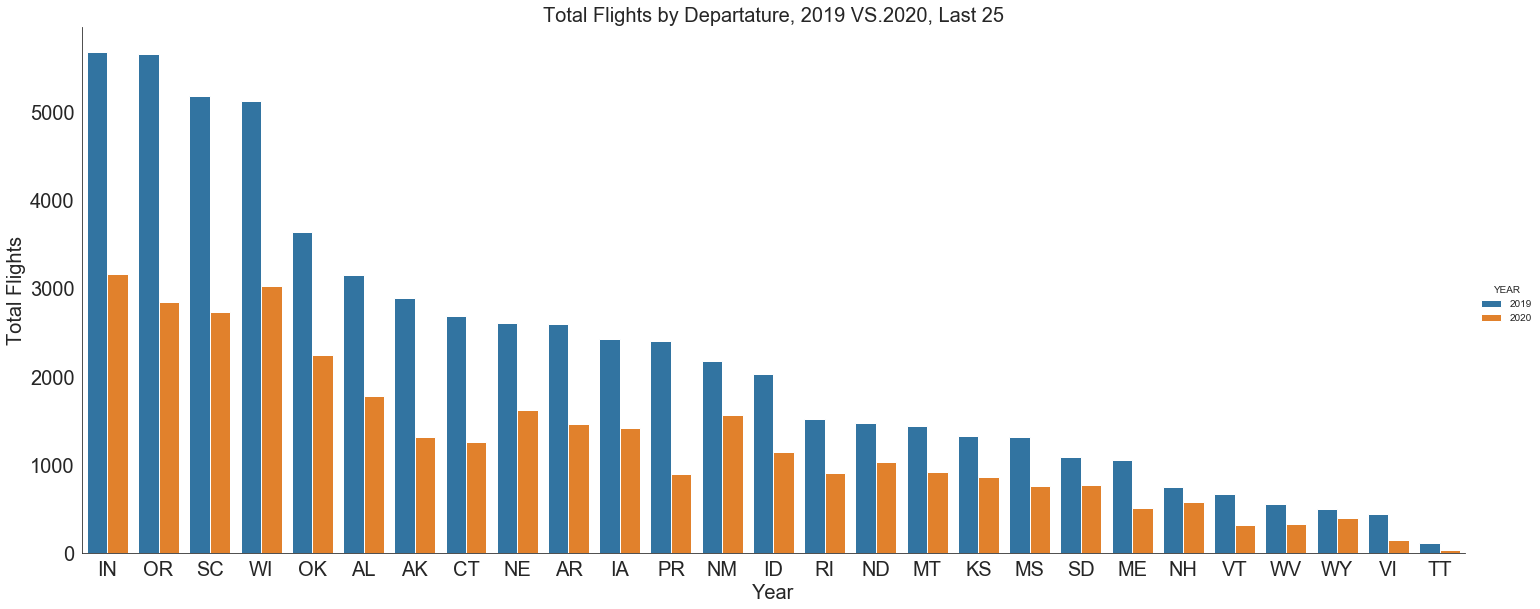

In [19]:
# plot flights by departature state, top 25
departature_order = airline.ORIGIN_STATE_ABR[airline['YEAR'] == 2019].value_counts().index
sb.set_style(style='white')
departure_top25 = sb.catplot(data=airline, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order[:25], height=8, aspect=2.5);
departure_top25.set_xticklabels(size = 20)
departure_top25.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Flights by Departature, 2019 VS.2020, Top 25', fontsize=20)

# plot flights by departature state, last 25 states
departure_last25 = sb.catplot(data=airline, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order[25:], height=8, aspect=2.5);
departure_last25.set_xticklabels(size = 20)
departure_last25.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Flights by Departature, 2019 VS.2020, Last 25', fontsize=20)

### Flight Number by Carrier Analysis
**Comment**: There is no clear evidence that the carriers are associated to the downsizing. It is likely that **regional airlines are more volatile**.(notice DL and OH are both owned by Delta Airlines)

Text(0.5, 1, 'Total Flights by Carrier, 2019 VS.2020')

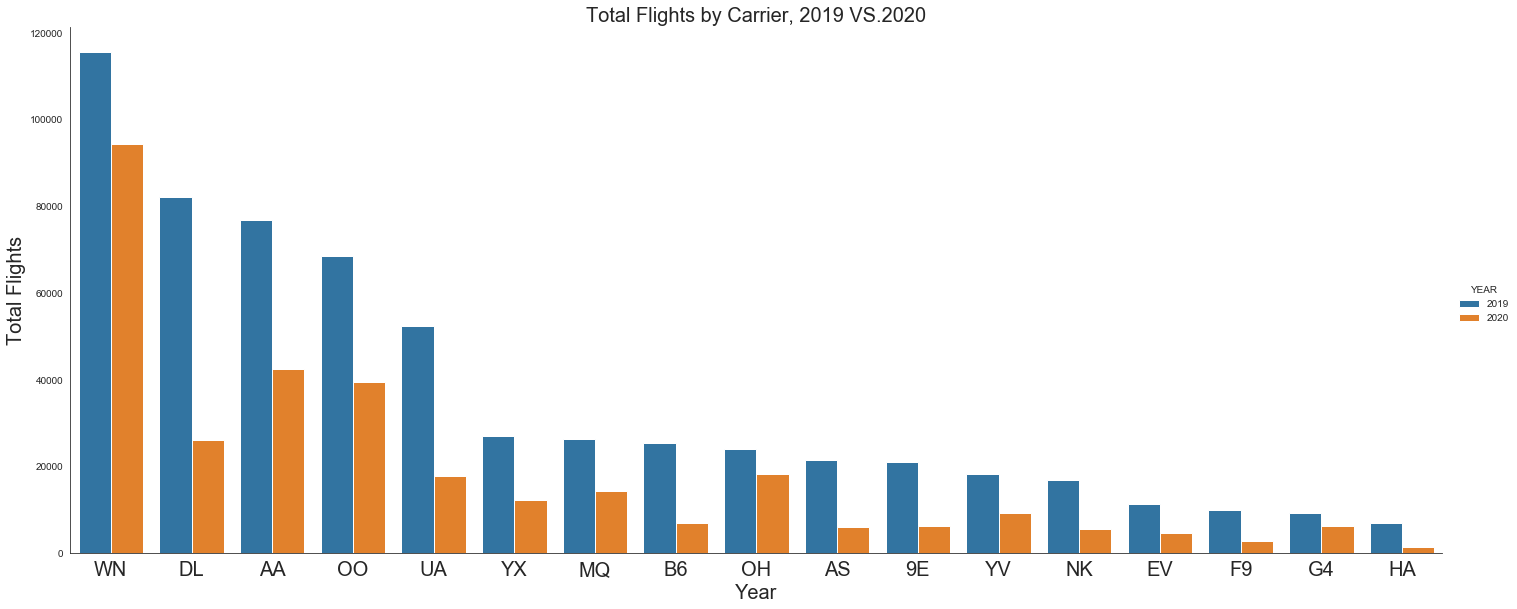

In [20]:
# plot flights by carrier
carrier_order = airline.OP_CARRIER[airline['YEAR'] == 2019].value_counts().index
flight_carrier = sb.catplot(data=airline, x='OP_CARRIER', hue="YEAR", kind='count',order = carrier_order, height=8, aspect=2.5);
flight_carrier.set_xticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Flights by Carrier, 2019 VS.2020', fontsize=20)

### Delayed Flights by Departature State Analysis

**Comment**: Every state had considerable amount of reduction of delays in 2020.

Text(0.5, 1, 'Total Delayed Flights by Departature, 2019 VS.2020, Last 25')

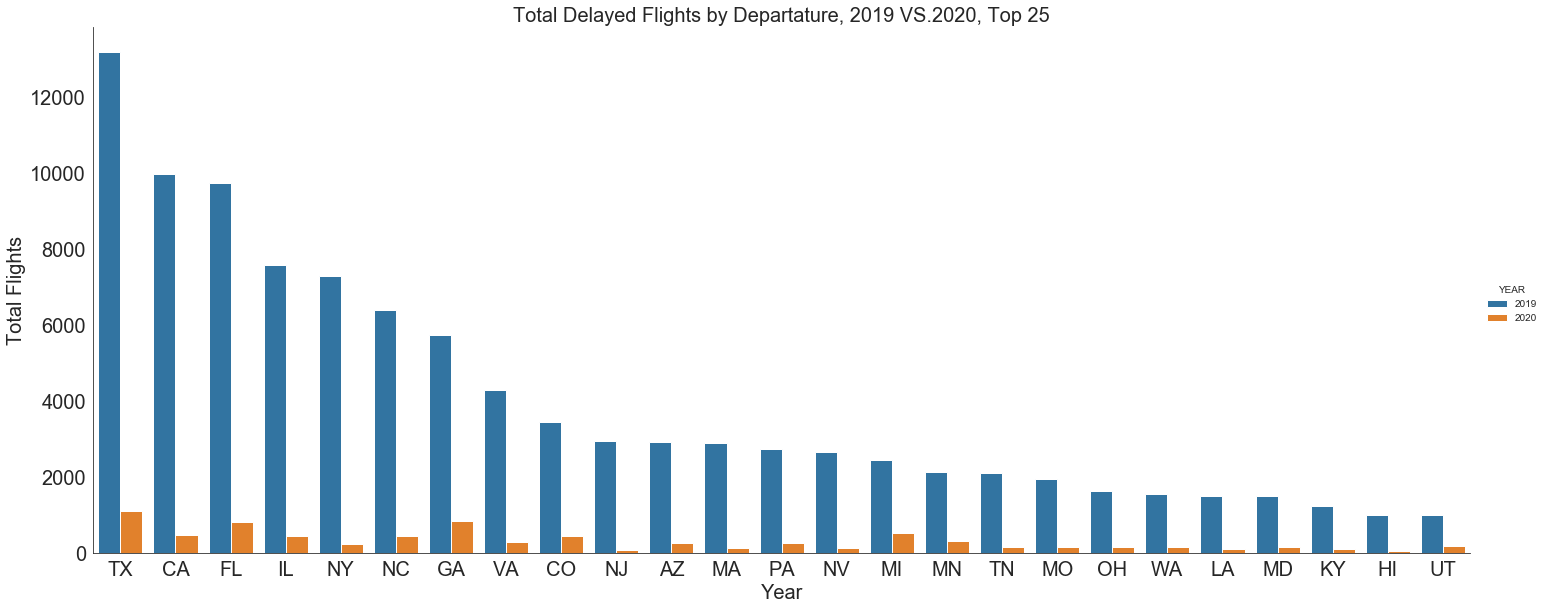

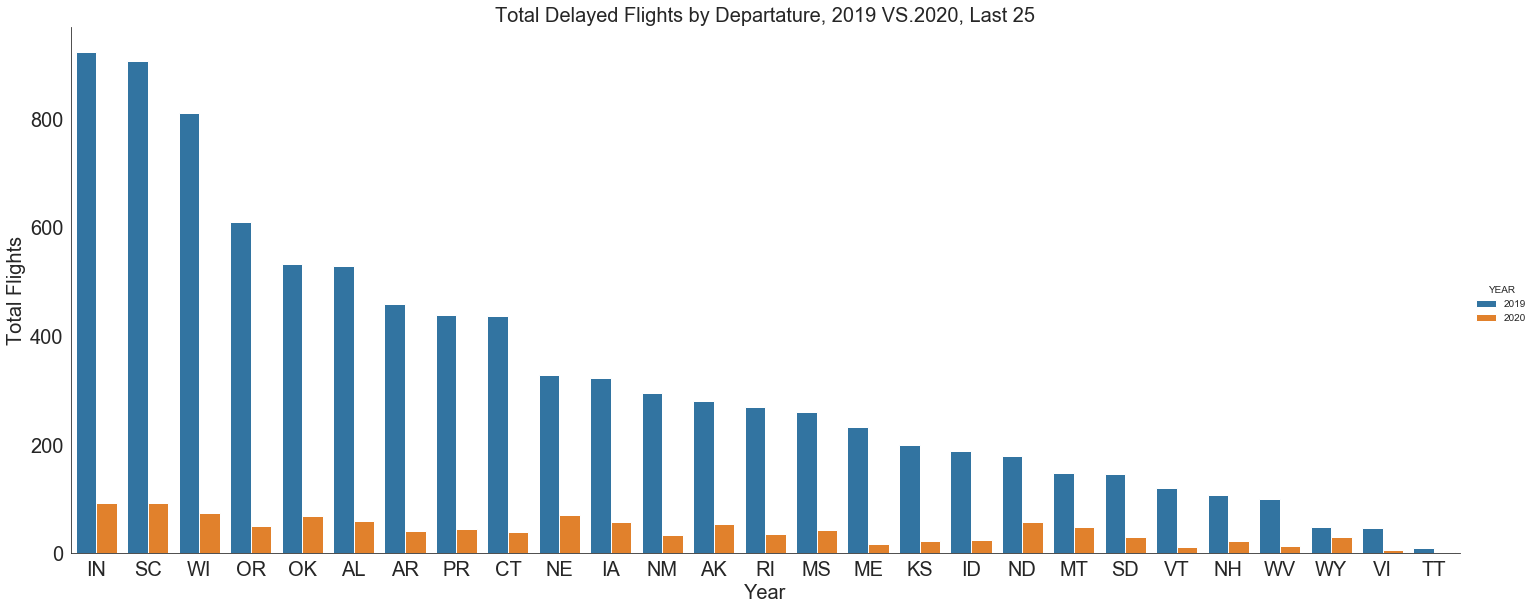

In [21]:
# plot delayed flights by states, top 25 
departature_order_delay = delay.ORIGIN_STATE_ABR[delay['YEAR'] == 2019].value_counts().index
sb.set_style(style='white')
departure_top25 = sb.catplot(data=delay, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order_delay[:25], height=8, aspect=2.5);
departure_top25.set_xticklabels(size = 20)
departure_top25.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Delayed Flights by Departature, 2019 VS.2020, Top 25', fontsize=20)

# plot delayed flights by states, 25 to last
departure_last25 = sb.catplot(data=delay, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order_delay[25:], height=8, aspect=2.5);
departure_last25.set_xticklabels(size = 20)
departure_last25.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Delayed Flights by Departature, 2019 VS.2020, Last 25', fontsize=20)

### Delayed Flights by Carrier Analysis

**Comment:** Delayed flight number was proportional to carrier size in 2019, but year 2020 was not proportional.

Text(0.5, 1, 'Total Delayed Flights by Carrier, 2019 VS.2020')

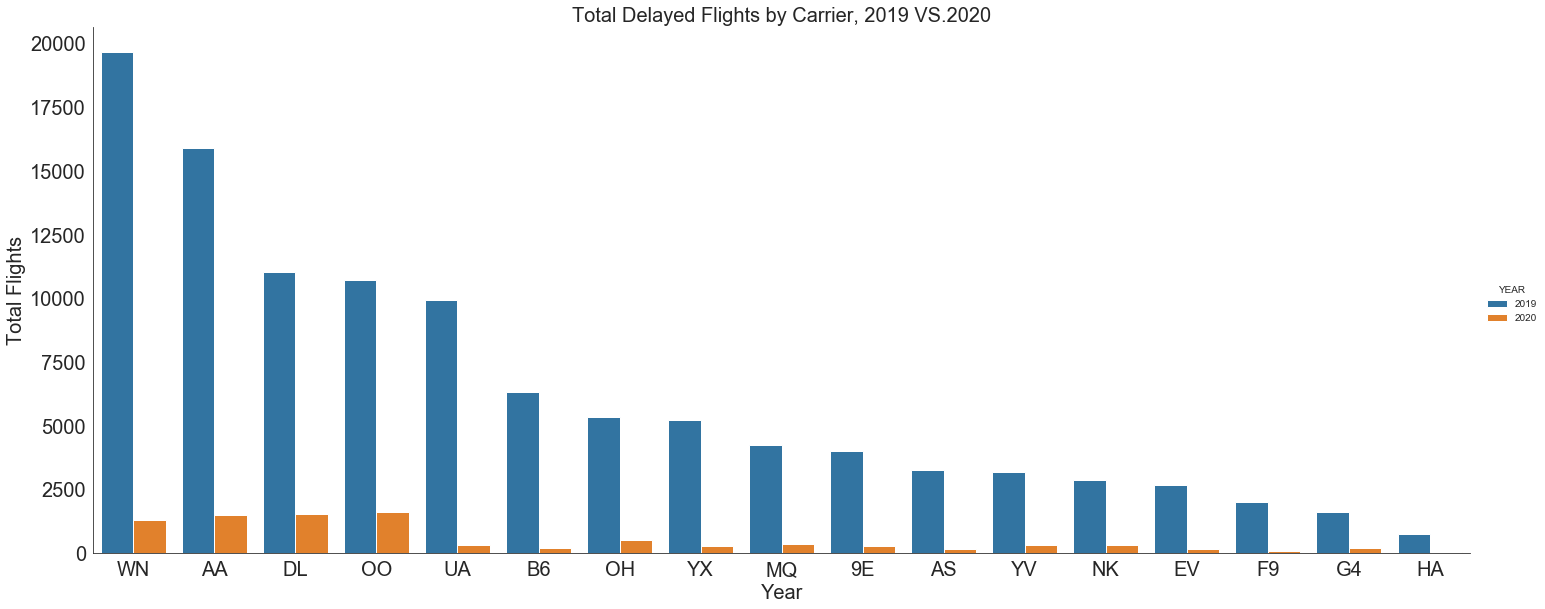

In [22]:
# plot delayed flights by carrier
carrier_order_delay = delay.OP_CARRIER[delay['YEAR'] == 2019].value_counts().index
carrier_delay = sb.catplot(data=delay, x='OP_CARRIER', hue="YEAR", kind='count',order = carrier_order_delay, height=8, aspect=2.5);
carrier_delay.set_xticklabels(size = 20)
carrier_delay.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Delayed Flights by Carrier, 2019 VS.2020', fontsize=20)

### Cancelled Flights by Deparature State Analysis
**Comment**: Every state had dramatic increase in cancelled flight this year. **New York and surrounding Northeastern states**(NJ- New Jersey, MA- Massachusetts) were relatively low in cancelled flights due to fewer existing flights.

Text(0.5, 1, 'Total Cancelled Flights by Departature, 2019 VS.2020, Last 25')

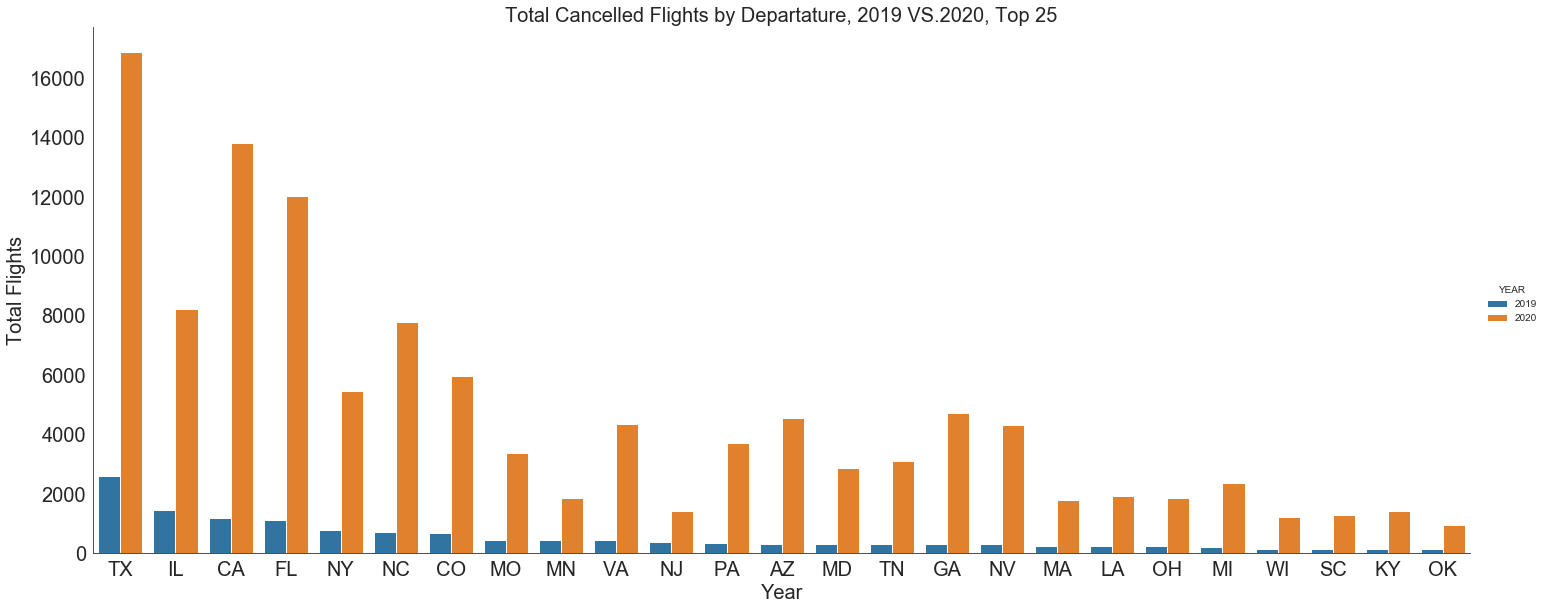

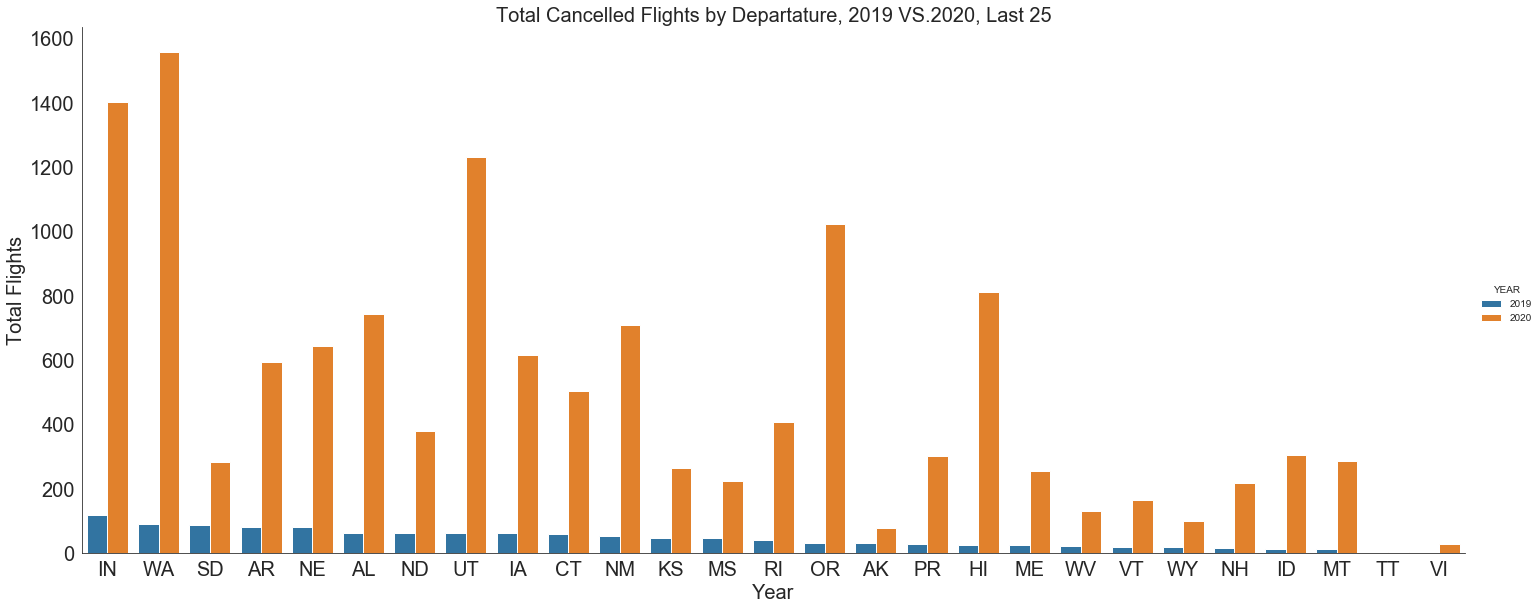

In [23]:
# plot cancelled flights by departure state, top 25
departature_order_cancelled = cancelled.ORIGIN_STATE_ABR[cancelled['YEAR'] == 2019].value_counts().index
sb.set_style(style='white')
departure_top25_cancelled = sb.catplot(data=cancelled, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order_cancelled[:25], height=8, aspect=2.5);
departure_top25_cancelled.set_xticklabels(size = 20)
departure_top25_cancelled.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Cancelled Flights by Departature, 2019 VS.2020, Top 25', fontsize=20)

# plot cancelled flights by departure state, 25 to last
departure_last25_cancelled = sb.catplot(data=cancelled, x='ORIGIN_STATE_ABR', hue="YEAR", kind='count',order = departature_order_cancelled[25:], height=8, aspect=2.5);
departure_last25_cancelled.set_xticklabels(size = 20)
departure_last25_cancelled.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Cancelled Flights by Departature, 2019 VS.2020, Last 25', fontsize=20)

### Delayed Flights by Carrier Analysis
The best performing airline with cancellation was **EV(ExpressJet Airlines LLC)**, a regional subsidiary of United Airlines.

Text(0.5, 1, 'Total Delayed Flights by Carrier, 2019 VS.2020')

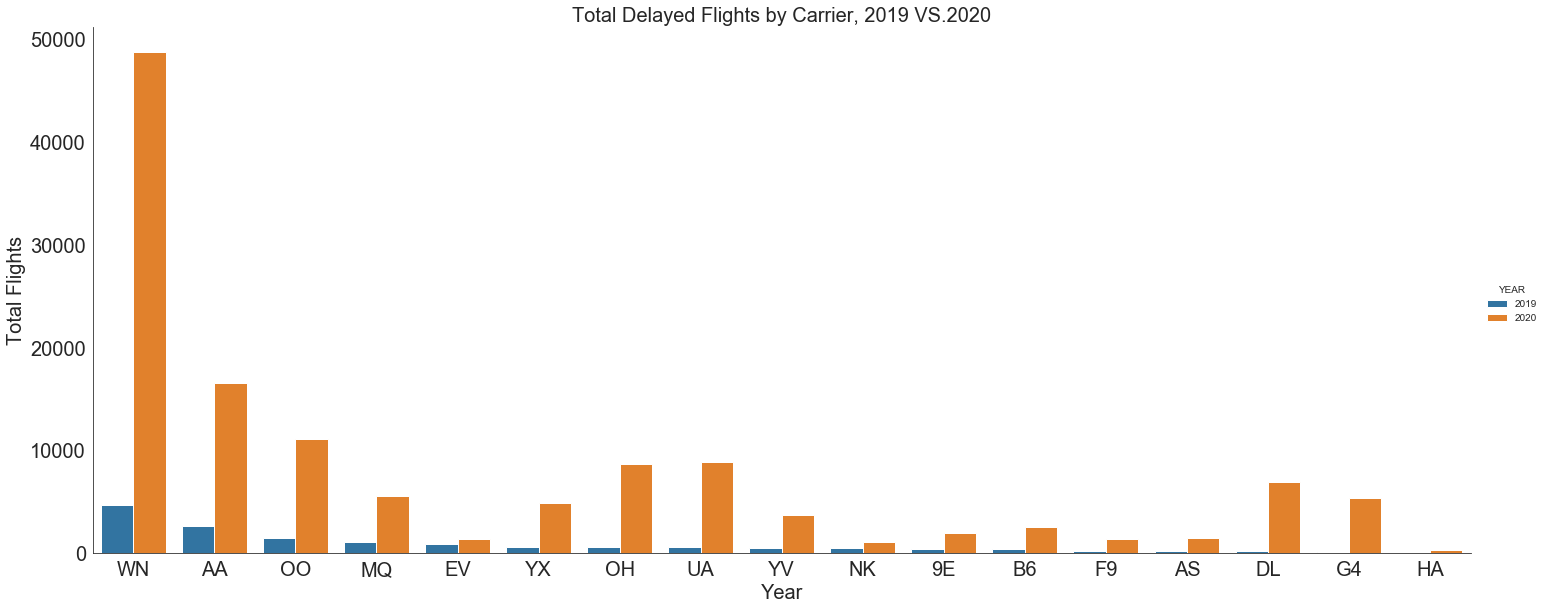

In [24]:
# plot cancelled flights by carrier
carrier_order_cancelled = cancelled.OP_CARRIER[cancelled['YEAR'] == 2019].value_counts().index
carrier_cancelled = sb.catplot(data=cancelled, x='OP_CARRIER', hue="YEAR", kind='count',order = carrier_order_cancelled, height=8, aspect=2.5);
carrier_cancelled.set_xticklabels(size = 20)
carrier_cancelled.set_yticklabels(size = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Flights', fontsize=20)
plt.title('Total Delayed Flights by Carrier, 2019 VS.2020', fontsize=20)

### Delay Reason, 2019 VS 2020
**Comment:** Typically, the chance to get a carrier delay, late aircrft delay or nas delay was all around 30% to 33%. Year 2020 came with a major decline on **Carrier Delay**(circumstances within the airline's control, maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) as a result of increasing cancelled flights. **Late Aircraft Delay** increased by 11.7%, which is unexpected. **National Aviation System**(a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.) increased relatively, which appeared to be a common issue.

Text(0.5, 1.0, '2020 Flight Delay by Reason')

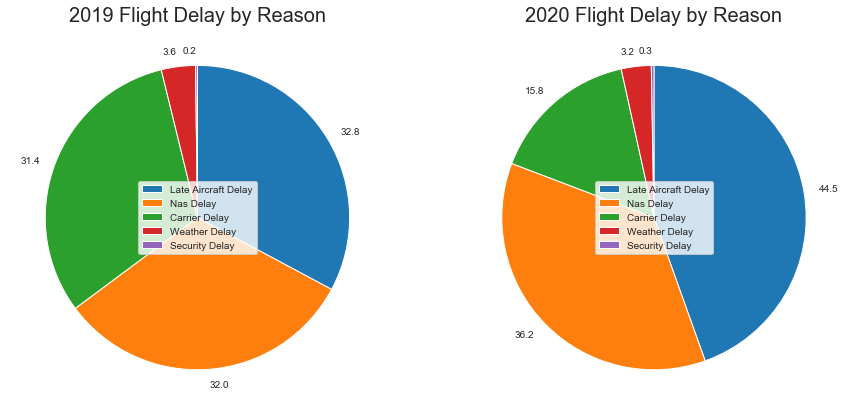

In [25]:
# plot delay reason pie chart for year 2019 and 2020
delay_2019 = delay_reason.Reason[delay_reason['YEAR'] == 2019].value_counts()
delay_2020 = delay_reason.Reason[delay_reason['YEAR'] == 2020].value_counts()
delay_2019_label= delay_2019/delay_2019.sum()
delay_2019_label= delay_2019_label.round(3)
delay_2019_label = delay_2019_label * 100
delay_2019_label= delay_2019_label.round(1)
delay_2020_label= delay_2020/delay_2020.sum()
delay_2020_label= delay_2020_label.round(3)
delay_2020_label = delay_2020_label * 100
delay_2020_label= delay_2020_label.round(1)

plt.figure(figsize=[15, 15])
plt.subplot(1, 2, 1)
plt.pie(delay_2019,startangle = 90, counterclock = False, labels=delay_2019_label, labeldistance=1.1);
plt.legend(delay_2019.index, loc="center")
plt.title('2019 Flight Delay by Reason', fontsize=20)

plt.subplot(1, 2, 2)
plt.pie(delay_2020,startangle = 90, counterclock = False, labels=delay_2020_label, labeldistance=1.1);
plt.legend(delay_2019.index, loc="center")
plt.title('Total Delayed Flights by Day of Week, 2019 VS.2020', fontsize=20)
plt.title('2020 Flight Delay by Reason', fontsize=20)


<a id='Bivarite Exploration'></a>
# Bivarite Exploration

### Delay distribution by Reason
**Comment:** There appeared to be a wide disperation of delay time, from 15 minutes to 24 hours. There was a **downward relationship** between delay time and delay flight numbers. **Late Aircraft delays** were typically within 2 hours, while other delay factors can retain up to 24 hours. **Carrier delay** are most responsible for one-day-delay, possibly contributed from flight date change.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


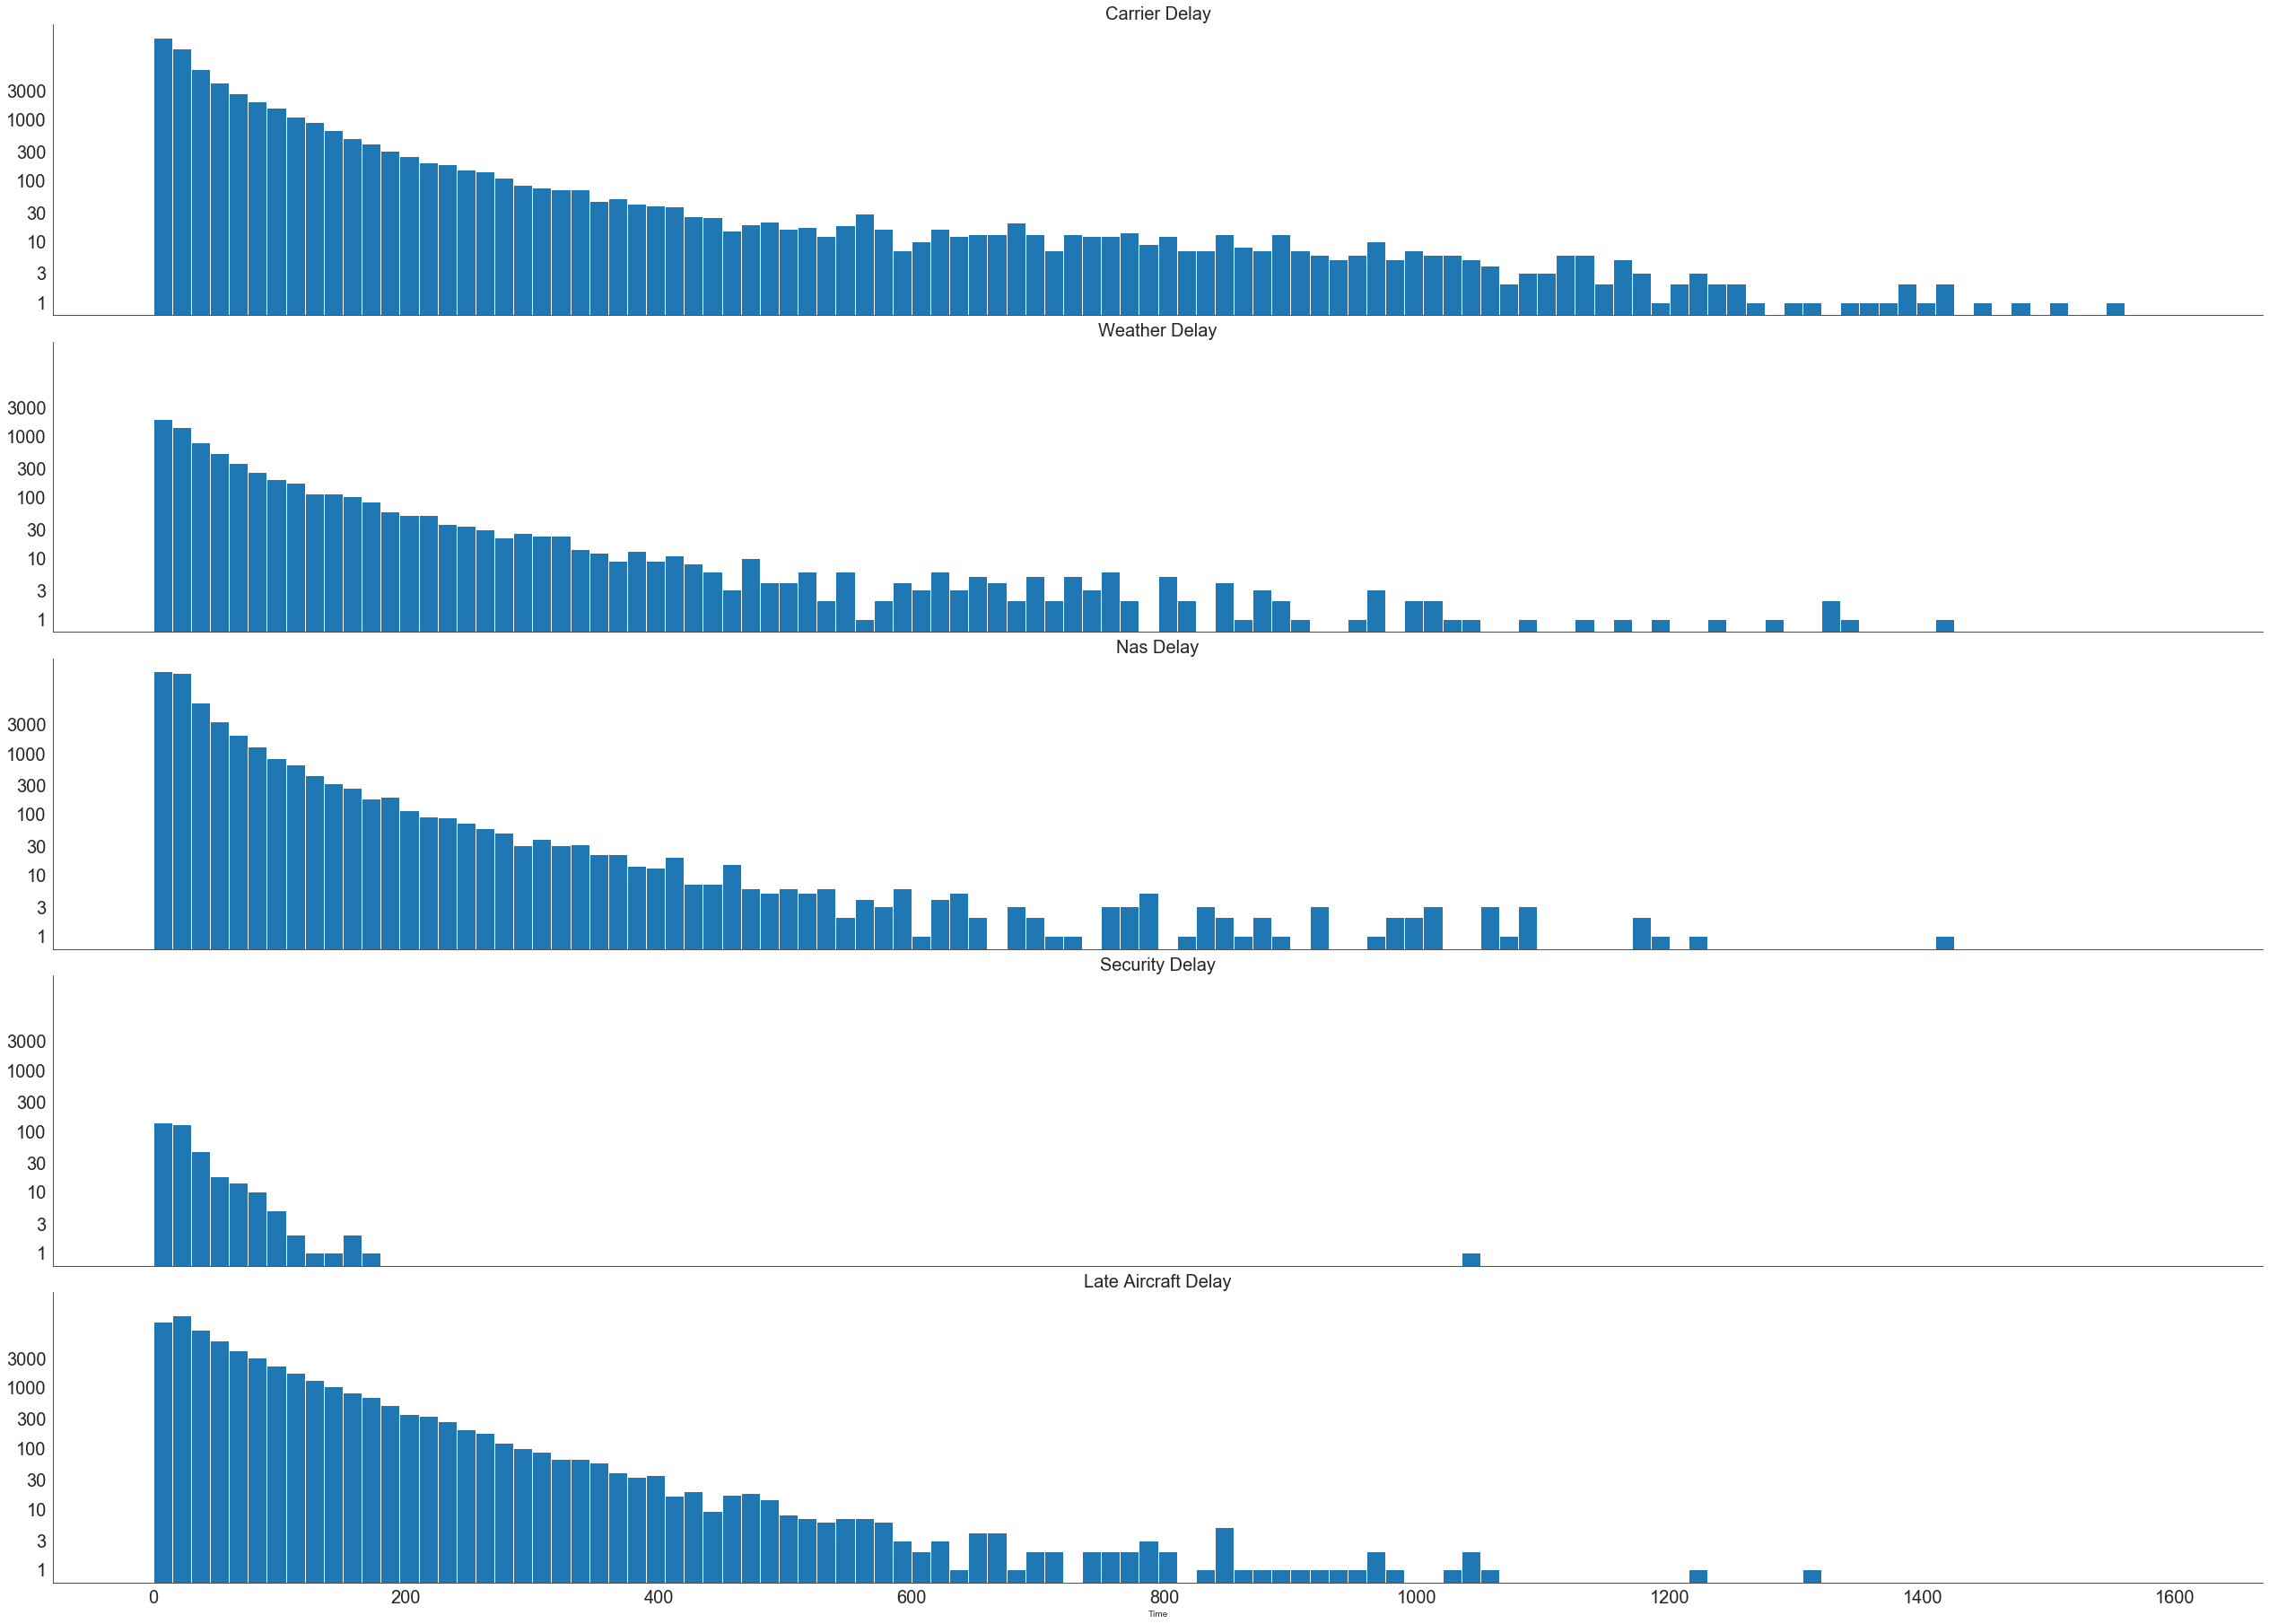

In [26]:
# plot delay time disperation by delay reason
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = [i for i in ticks]
g = sb.FacetGrid(data = delay_reason, row = 'Reason', size = 5, aspect = 7)
g.map(plt.hist, 'Time', bins = np.arange(0, 1600, 15)).set(yscale = 'log')
g.set_xticklabels(size = 20)
g.set_yticklabels(size = 20)
g.set(yticks = ticks, yticklabels = labels)
g.set_titles('{row_name}', size = 20)

### Flight Numbers by Day of Week and Hours

**Comments:** Each block represents the number of flights in that time section, for example Monday 7am to 8am. The leftmost block is Monday, while the rightmost of the block is Sunday. The chart starts at 6am in the morning and ends in 1am, as each block represents 1 hour. Each block contains the total flight of that month, if you need daily statstics, you need to **devide the number by 4**.<br> 
Generally(2019), **Monday** is the busiest day of the week, followed by Tuesday. Saturday generally has fewer flights. The peak level is **morning rush hour(6am to 9am), evening peak(5pm to 7pm), as well as noon(10am - 1pm)**. What surprise me is the number of flights in between 12pm and 1am is higher than 11pm to 12pm.<br>
This year(2020), **Wedensday** and **Thursdau** were the busiest day of the week, despite only having **half of the flight number** comparing to year 2019. The flight schedule was more **evenly distributed** among every day.

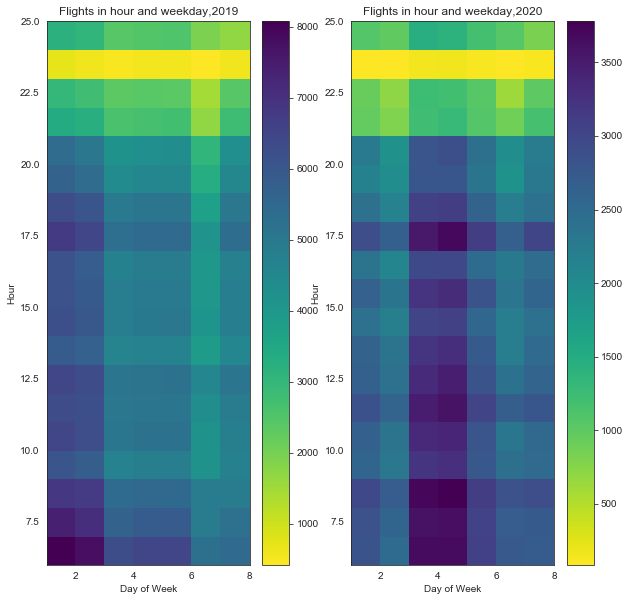

In [27]:
# plot flight numbers by hour and weekday
airline2019 = airline[airline['YEAR'] == 2019]
airline2020 = airline[airline['YEAR'] == 2020]


plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
bins_x = np.arange(1, 9, 1)
bins_y = np.arange(6, 26, 1)
plt.hist2d(data = airline2019, x = 'DAY_OF_WEEK', y = 'DEP_TIME_BLK',bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title('Flights in hour and weekday,2019')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist2d(data = airline2020, x = 'DAY_OF_WEEK', y = 'DEP_TIME_BLK',bins = [bins_x, bins_y],cmap = 'viridis_r')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title('Flights in hour and weekday,2020')
plt.colorbar()

### Delay Flight Numbers by Day of Week and Hours
**Comment:** In 2019, Monday was the day with most delays and the Friday was the second most frequent delayed day. With the **highest amount of flights in Monday**, Monday was congested **all day** with delayed flights. **Friday** experienced high level of congestion at dinner time for people **travelling home**.<br>
In 2020, there was no indication of delay pattern. People were not travelling that much and the only 'rush hour' appeared to be **Monday morning**.

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


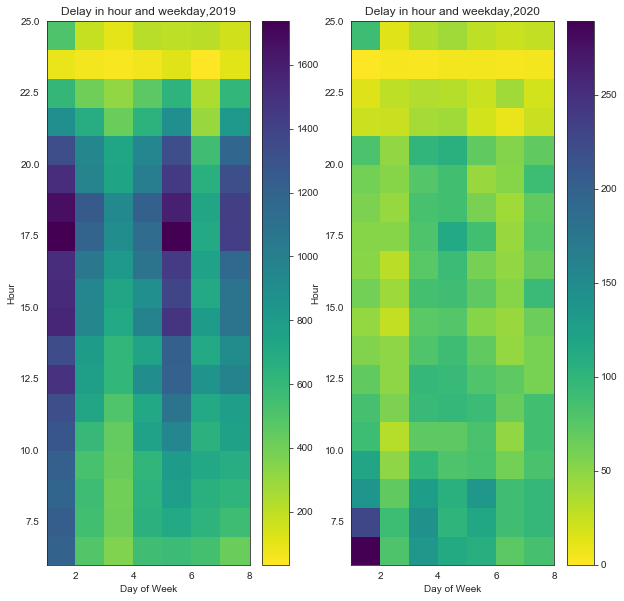

In [28]:
# plot delay flight numbers by hour and weekday
delay['DAY_OF_WEEK'] = delay['DAY_OF_WEEK'].astype('int64')
delay['DEP_TIME_BLK'] = delay['DEP_TIME_BLK'].astype('int64')

delay2019 = delay[delay['YEAR'] == 2019]
delay2020 = delay[delay['YEAR'] == 2020]


plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
bins_x = np.arange(1, 9, 1)
bins_y = np.arange(6, 26, 1)
plt.hist2d(data = delay2019, x = 'DAY_OF_WEEK', y = 'DEP_TIME_BLK',bins = [bins_x, bins_y],cmap = 'viridis_r')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title('Delay in hour and weekday,2019')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist2d(data = delay2020, x = 'DAY_OF_WEEK', y = 'DEP_TIME_BLK',bins = [bins_x, bins_y],cmap = 'viridis_r')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title('Delay in hour and weekday,2020')
plt.colorbar()

<a id='Multivariate Exploration'></a>
# Multivariate Exploration

### Delay Distribution by Day of Week & Time
**Comment:** The typical delay time was around 20 - 40 minutes for a delayed flight. The delay flight number of 2019 somehow appeared to have **normal distibution** with delay time.<br>
The delay time for 2020 got a **higher median** than 2019 in the morning and **lower median** in afternoon. Showing **longer delayed time in morning and shorter delays in afternoon**. Moreover, there was a wider dispersion of delayed time/early take off time, referring to higher possiblity of longer delayed time or flight schedule change.<br>
A question about this graph is that flights could be taken off as early as 100+ minutes ahead of normal departure time. It this part of data vaild?

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


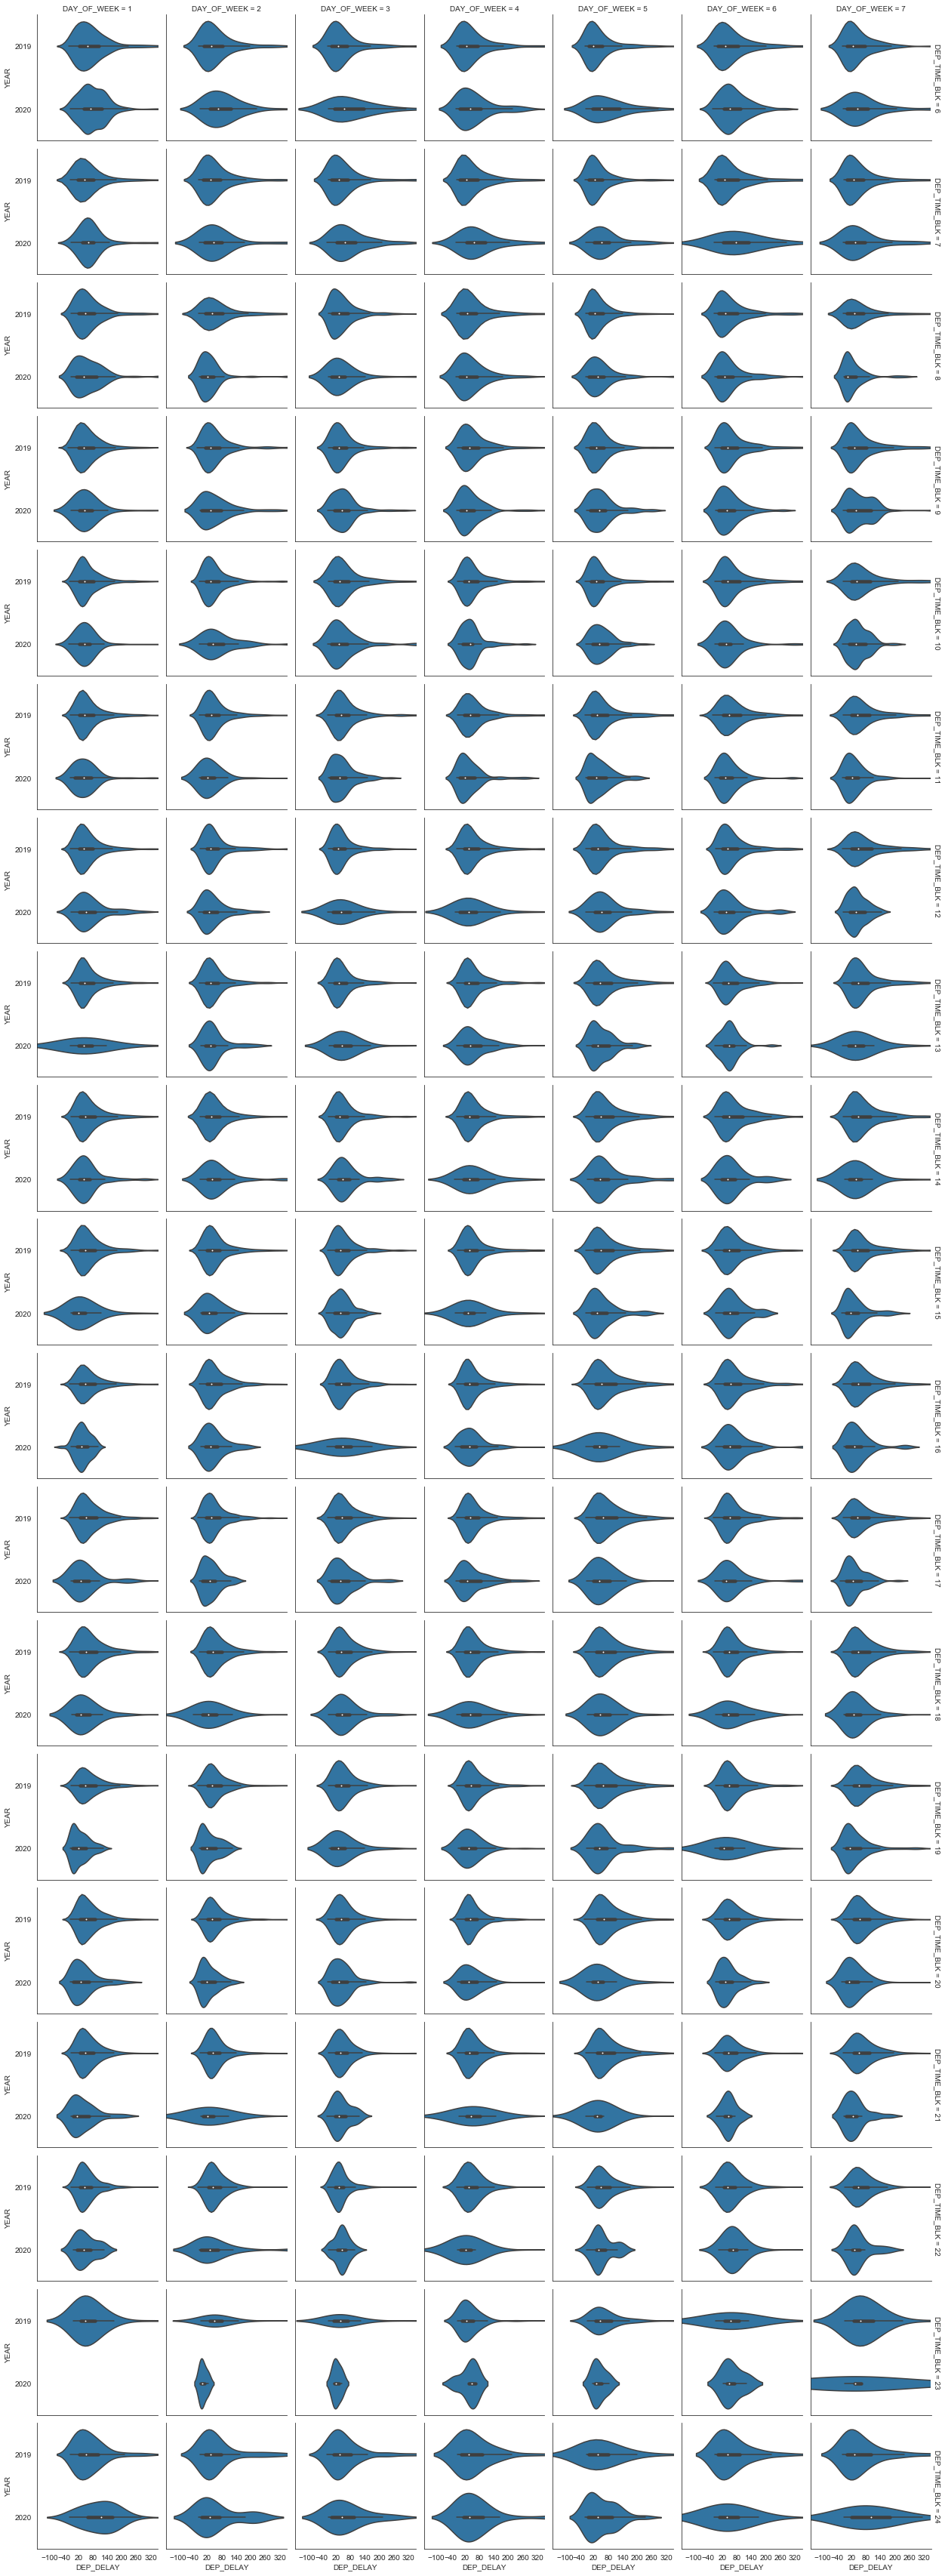

In [29]:
# plot a violionplot distribution for delay/day/week
delay['YEAR'] = delay['YEAR'].astype('category')

base_color = sb.color_palette()[0]

g = sb.FacetGrid(data = delay, col = 'DAY_OF_WEEK', row = 'DEP_TIME_BLK', size = 2.5,margin_titles = True)
g = g.map(sb.violinplot, 'DEP_DELAY', 'YEAR')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xlim(-150,350)
    ax.set_xticks(range(-100,330,60)) 
plt.show()

<a id='Oberservation'></a>
# Oberservation
### Talk about some of the relationships you observed in the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In my expolration, I mainly looked into two parts -  **i. 2019 vs 2020 comparsion & ii. delay factors and distribution**<br>

**2019 vs 2020 summary:** The flight performance of April 2020 was heavily affected by the virus and travel restriction. The data had 313,382 flights, 9,038 delayed flights and 130,078 cancelled flights. Comparing to 2019 April, **the number of flights decreased by 48.8%**, the number of **delayed flights decreased by 91.7%** with relative **delayed rate**(delay/total flights) **decreased by 14.8%**. The number of **cancelled flights increased by 866.86%**. The actual **departatured flights(total flights-cancelled flights) decreased by 69.3%**.

**Delay factors and distribution:** Typically, the chance of having carrier delay, late aircrft delay or nas delay was all around 30% to 33%. The typical delay time was around 20 - 40 minutes for a delayed flight. The delay flight number of 2019 somehow appeared to have **normal distibution** with delay time.<br>
All types of delays, had a wide spread of distruction and can last 24 hours. Except late aircraft delay which was 3 hour maximum.<br>

In 2019, the most delays occurred on Monday and the Friday is the second most frequent delayed day. With the **highest amount of flights in Monday**, Monday was congested **all day** with delayed flights. **Friday** experienced high level of congestion at dinner time for people **travelling home**.<br>
In 2020, there was no indication of delay pattern. People were not travelling that much and the only 'rush hour' appears to be **Monday morning**.

### How does this answer my question?
**_Hypothesis: I expect the flights in 2020.4 are less likely to be delayed, more but likely to be cancelled comparing to 2019.4 due to travel restriction. I expect the cause of delay will be quite different._**<br>
**Answer: The number proved my prediction for the flight delay and cancellation. However, the cause of delay seems similar to last year. Moreover, the pattern of delay time is a bit different in terms of distibution and scale.**


### References:
Add percentage on seaborn:https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn<br>
Round percentage in chart:https://stackoverflow.com/questions/43675014/panda-python-dividing-a-column-by-100-then-rounding-by-2-dp<br>
Set Xticks in Facet Grid:https://stackoverflow.com/questions/43727278/how-to-set-readable-xticks-in-seaborns-facetgrid